**1. Importing Libraries**

This section imports essential Python libraries used throughout the project.


*   NumPy and Pandas are for data manipulation and analysis.
*   Seaborn and Matplotlib are used to create visualizations that help understand the data.
*  Scikit-learn modules are imported for data preprocessing, model training, and evaluation.







In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

**2. Loading the Dataset**

The dataset is loaded from a CSV file into a Pandas DataFrame. Initial exploration includes displaying the first few rows, checking the dataset shape, data types, and identifying missing values

In [ ]:
df = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


**3. Data Cleaning**

Rows with missing values are removed to ensure the dataset is complete for modeling. The Loan_ID column, which is just an identifier and holds no predictive value, is dropped.

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
# df = df.drop(columns=['Loan_ID'])

In [ ]:
print(df.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


**4. Transforming Features**

The Dependents column has a special category '3+' which is converted to the integer 4 for numerical consistency. This allows the column to be treated as a numeric feature.

In [ ]:
df['Dependents'] = df['Dependents'].replace('3+', 4).astype(int)

**5. Encoding Binary Categorical Variables**

Columns such as Gender, Married, Self_Employed, and Loan_Status which have two categories are converted into numerical labels (0 and 1) for model compatibility.

In [ ]:
binary_cols = ['Gender', 'Married', 'Self_Employed', 'Loan_Status']

In [ ]:
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])


**6. Encoding Multi-Class Categorical Variables**

Columns with more than two categories, like Education and Property_Area, are converted using one-hot encoding. This creates new binary columns representing each category while avoiding redundancy by dropping the first category.

In [ ]:
df = pd.get_dummies(df, columns=['Education', 'Property_Area'], drop_first=True)

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')

**7. Visualizing Loan Status Distributions**

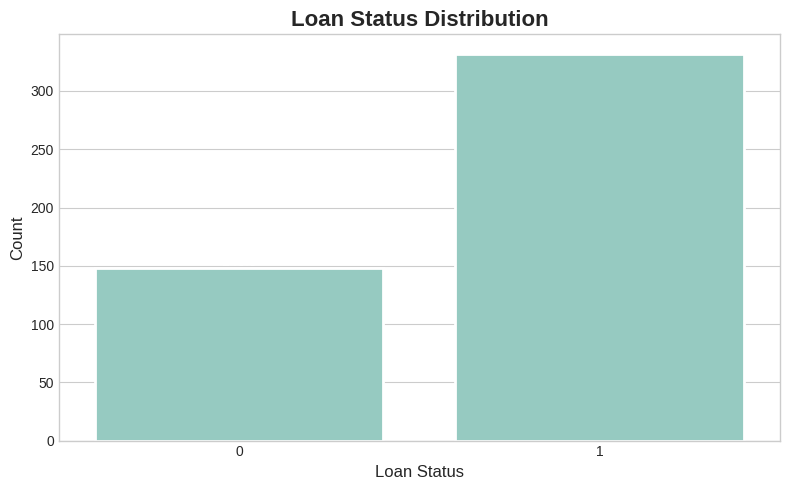

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Loan_Status', edgecolor='white', linewidth=2)
plt.title('Loan Status Distribution', fontsize=16, weight='bold')
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height() + 2),
                ha='center', color='white', fontsize=10)
plt.tight_layout()
plt.show()

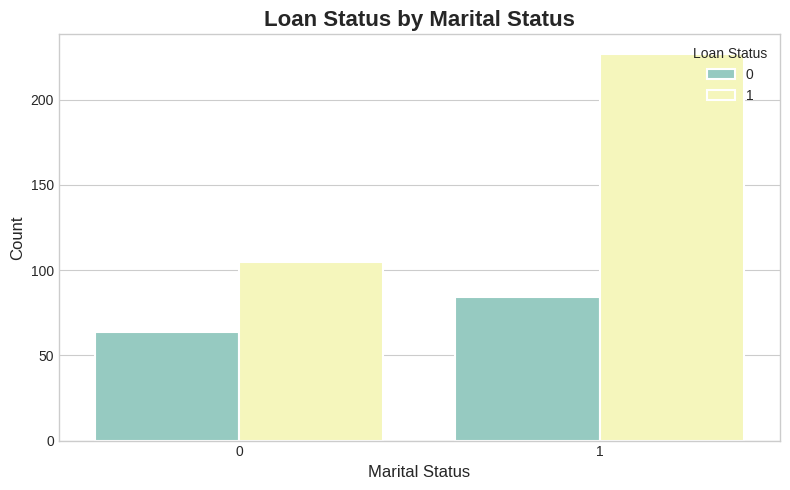

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Married', hue='Loan_Status', edgecolor='white', linewidth=1.5)
plt.title('Loan Status by Marital Status', fontsize=16, weight='bold')
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Loan Status', loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
print(df.columns)

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'Education_Not Graduate', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')


In [ ]:
def decode_property_area(row):
    if row['Property_Area_Semiurban'] == 1:
        return 'Semiurban'
    elif row['Property_Area_Urban'] == 1:
        return 'Urban'
    else:
        return 'Rural'

df_decoded = df.copy()

df_decoded['Property_Area'] = df_decoded.apply(decode_property_area, axis=1)

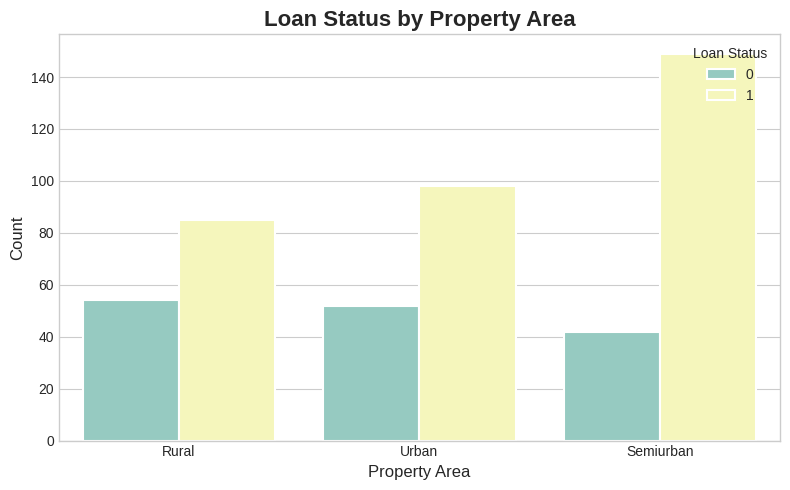

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df_decoded, x='Property_Area', hue='Loan_Status', edgecolor='white', linewidth=1.5)
plt.title('Loan Status by Property Area', fontsize=16, weight='bold')
plt.xlabel('Property Area', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Loan Status', loc='upper right')
plt.tight_layout()
plt.show()

**8. Visualizing Applicant Income Distribution**

A histogram with a kernel density estimate displays the spread and skewness of applicant incomes, which can affect loan approval chances.

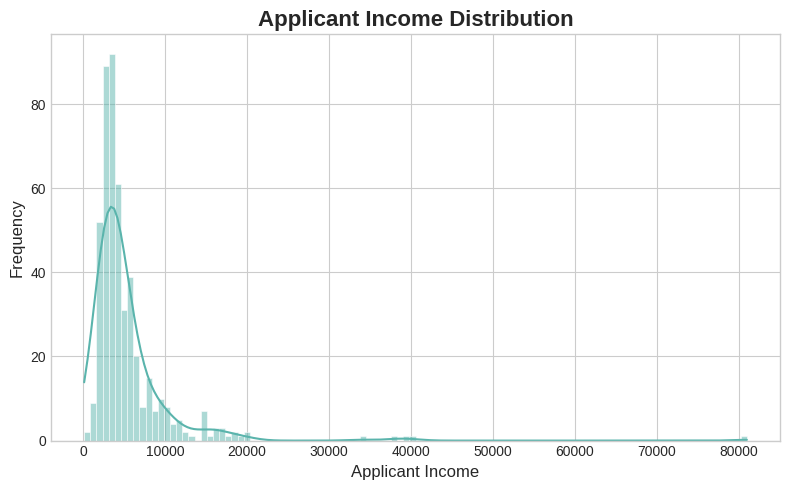

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.histplot(data=df, x='ApplicantIncome', kde=True, color='#5ab4ac')
plt.title('Applicant Income Distribution', fontsize=16, weight='bold')
plt.xlabel('Applicant Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

**9. Feature Correlation Heatmap**

A heatmap visualizes correlations between numerical features, helping identify strong positive or negative relationships and potential redundant variables.

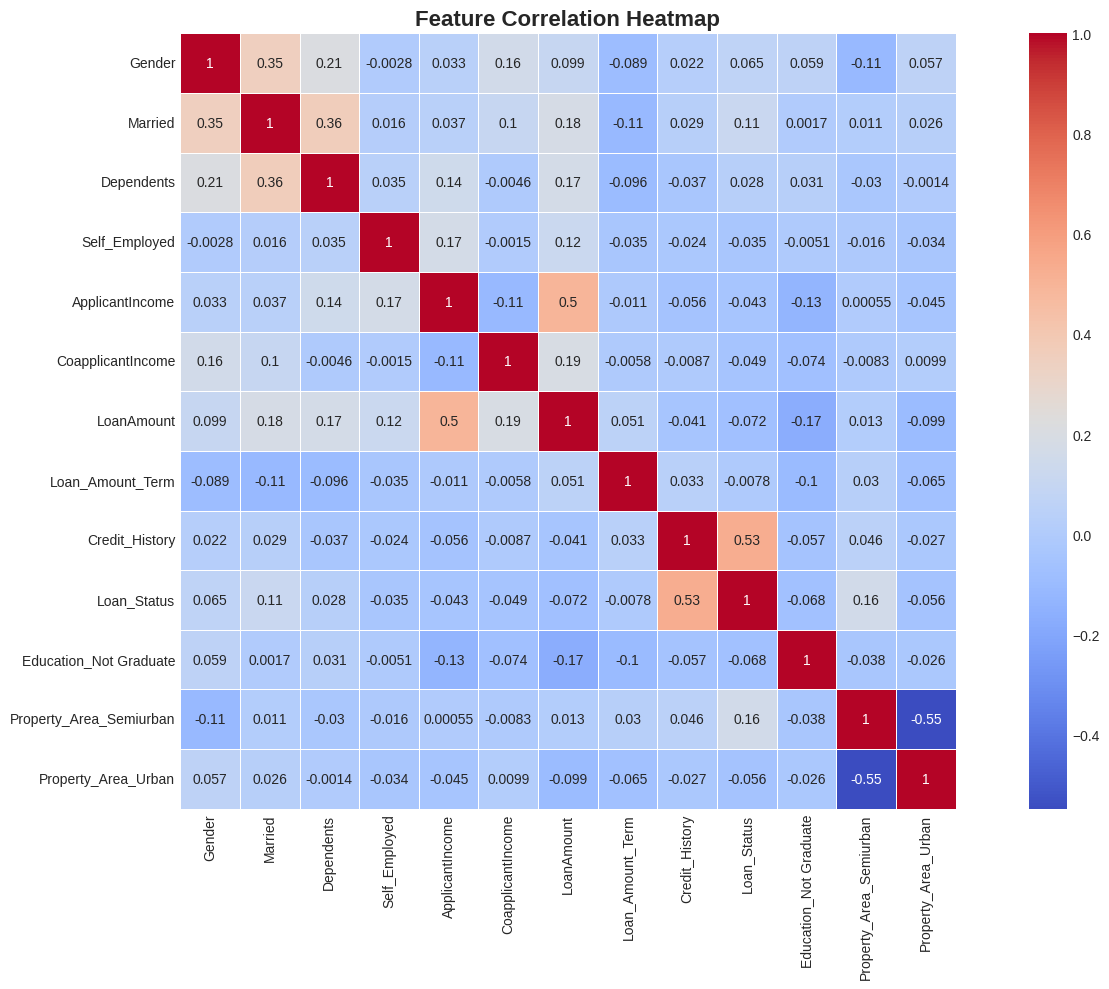

In [ ]:
plt.figure(figsize=(15, 10))
corr = df.corr(numeric_only=True)
ax = sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white', square=True)
plt.title('Feature Correlation Heatmap', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

**10. Preparing Features and Labels**

The dataset is split into features (X) used for training and the target label (y), which indicates loan approval status.

In [ ]:
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

**11. Splitting Data into Training and Testing Sets**

The dataset is divided into training and testing subsets to evaluate model generalization. A stratified split maintains the class distribution in both subsets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=2)

In [ ]:
classifier = svm.SVC(kernel='linear')

**12. Training the Support Vector Machine Model**

An SVM classifier with a linear kernel is trained on the training data to learn how to distinguish between approved and rejected loans.

In [ ]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
X_train_prediction = classifier.predict(X_train)

In [ ]:
training_accuracy = accuracy_score(X_train_prediction, y_train)

In [ ]:
training_accuracy

0.7870370370370371

In [ ]:
X_test_prediction = classifier.predict(X_test)

In [ ]:
test_accuracy = accuracy_score(X_test_prediction, y_test)

In [ ]:
test_accuracy

0.8125